In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("/home/shravan/data_mining/bank-1.csv")
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [46]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


In [47]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [48]:
df_original = df

## B. Process and Encode Categorical Features

In [49]:
test = df.copy()
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes


In [50]:
contacted = []
for d in test['pdays']:
    if d == -1:
        contacted.append(0)
    else:
        contacted.append(d)
test['contacted'] = contacted
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,contacted
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no,131
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no,133
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no,239
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no,238
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no,307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes,0
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes,0
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes,0
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes,0


In [51]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'subscribed'],
                        dummy_na=True,
                        drop_first=True,
                   )
df.tail()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_may,month_nov,month_oct,month_sep,month_nan,poutcome_other,poutcome_success,poutcome_nan,subscribed_yes,subscribed_nan
1995,20.0,no,2785,no,no,16,327,2,-1,0,...,0,0,0,1,0,0,0,1,1,0
1996,28.0,no,127,no,no,16,1334,2,-1,0,...,0,0,0,1,0,0,0,1,1,0
1997,81.0,no,1154,no,no,17,231,1,-1,0,...,0,0,0,1,0,0,0,1,1,0
1998,46.0,no,4343,yes,no,20,185,1,-1,0,...,0,0,0,1,0,0,0,1,1,0
1999,40.0,no,6403,no,no,22,208,2,-1,0,...,0,0,0,1,0,0,0,1,1,0


In [53]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_may,month_nov,month_oct,month_sep,month_nan,poutcome_other,poutcome_success,poutcome_nan,subscribed_yes,subscribed_nan
0,32.0,no,392,yes,no,1,957,2,131,2,...,0,0,0,0,0,0,0,0,0,0
1,39.0,no,688,yes,yes,1,233,2,133,1,...,0,0,0,0,0,0,0,0,0,0
2,59.0,no,1035,yes,yes,1,126,2,239,1,...,0,0,0,0,0,0,0,0,0,0
3,47.0,no,398,yes,yes,1,274,1,238,2,...,0,0,0,0,0,0,0,0,0,0
4,54.0,no,1004,yes,no,1,479,1,307,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,no,2785,no,no,16,327,2,-1,0,...,0,0,0,1,0,0,0,1,1,0
1996,28.0,no,127,no,no,16,1334,2,-1,0,...,0,0,0,1,0,0,0,1,1,0
1997,81.0,no,1154,no,no,17,231,1,-1,0,...,0,0,0,1,0,0,0,1,1,0
1998,46.0,no,4343,yes,no,20,185,1,-1,0,...,0,0,0,1,0,0,0,1,1,0


In [54]:
# now one-hot encode all other categorical columns

df = pd.get_dummies(df, drop_first=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,month_nan,poutcome_other,poutcome_success,poutcome_nan,subscribed_yes,subscribed_nan,default_yes,housing_yes,loan_yes
0,32.0,392,1,957,2,131,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,39.0,688,1,233,2,133,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,59.0,1035,1,126,2,239,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,47.0,398,1,274,1,238,2,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,54.0,1004,1,479,1,307,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
df.keys()

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_nan',
       'marital_married', 'marital_single', 'marital_nan',
       'education_secondary', 'education_tertiary', 'education_nan',
       'contact_telephone', 'contact_nan', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'month_nan',
       'poutcome_other', 'poutcome_success', 'poutcome_nan', 'subscribed_yes',
       'subscribed_nan', 'default_yes', 'housing_yes', 'loan_yes'],
      dtype='object')

## Treatment of missing values in Numeric Columns

In [57]:
df.isna().sum()

age                    12
balance                 0
day                     0
duration                0
campaign                0
pdays                   0
previous                0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_nan                 0
marital_married         0
marital_single          0
marital_nan             0
education_secondary     0
education_tertiary      0
education_nan           0
contact_telephone       0
contact_nan             0
month_aug               0
month_dec               0
month_feb               0
month_jan               0
month_jul               0
month_jun               0
month_mar               0
month_may               0
month_nov               0
month_oct               0
month_sep               0
month_nan               0
poutcome_oth

## Impute missing values

In [59]:
df.keys()

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_nan',
       'marital_married', 'marital_single', 'marital_nan',
       'education_secondary', 'education_tertiary', 'education_nan',
       'contact_telephone', 'contact_nan', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'month_nan',
       'poutcome_other', 'poutcome_success', 'poutcome_nan', 'subscribed_yes',
       'subscribed_nan', 'default_yes', 'housing_yes', 'loan_yes'],
      dtype='object')

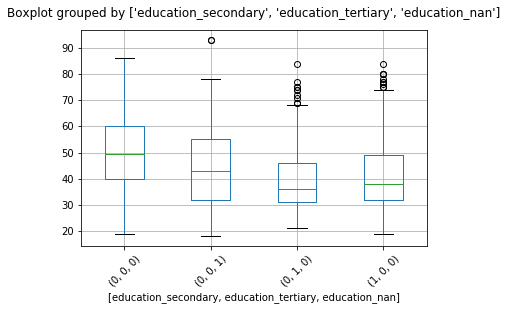

In [60]:
df.boxplot(column='age', by=['education_secondary','education_tertiary', 'education_nan'], rot=45)
plt.title("")
plt.show()

In [61]:
df['age'].fillna(df['age'].median(), inplace=True)


In [62]:
df.isna().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
marital_married        0
marital_single         0
marital_nan            0
education_secondary    0
education_tertiary     0
education_nan          0
contact_telephone      0
contact_nan            0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
month_nan              0
poutcome_other         0
poutcome_success       0


## Rescalling

In [64]:
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,month_nan,poutcome_other,poutcome_success,poutcome_nan,subscribed_yes,subscribed_nan,default_yes,housing_yes,loan_yes
0,32.0,392,1,957,2,131,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,39.0,688,1,233,2,133,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,59.0,1035,1,126,2,239,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,47.0,398,1,274,1,238,2,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,54.0,1004,1,479,1,307,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,2785,16,327,2,-1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
1996,28.0,127,16,1334,2,-1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
1997,81.0,1154,17,231,1,-1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
1998,46.0,4343,20,185,1,-1,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0


In [65]:
robust_scaler = RobustScaler()
df[['duration',
    'balance', 'pdays']] = robust_scaler.fit_transform(df[['duration',
                                                     'balance', 'pdays']])

In [66]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,month_nan,poutcome_other,poutcome_success,poutcome_nan,subscribed_yes,subscribed_nan,default_yes,housing_yes,loan_yes
0,32.0,-0.110187,1,3.094421,2,-0.291013,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,39.0,0.094941,1,-0.012876,2,-0.279601,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,59.0,0.335412,1,-0.472103,2,0.325250,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,47.0,-0.106029,1,0.163090,1,0.319544,2,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,54.0,0.313929,1,1.042918,1,0.713267,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
df['age'] = df['age']/100

## Treatment of Outliers

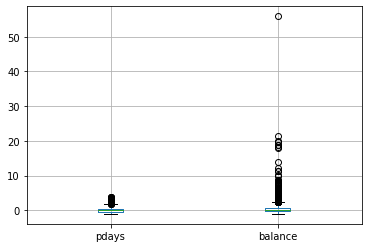

In [68]:
df.boxplot(column=['pdays','balance'])
plt.show()

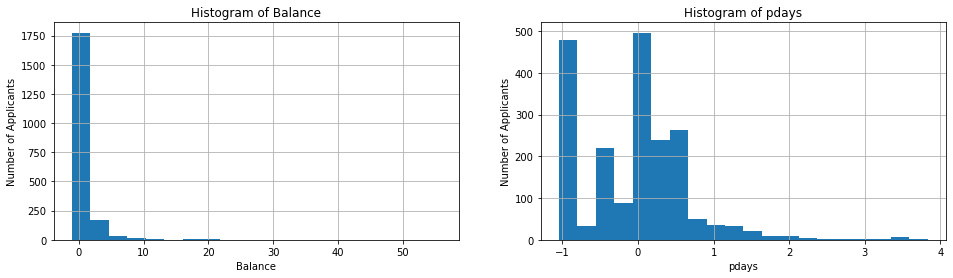

In [69]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Balance")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of Applicants')
df['balance'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of pdays")
ax3.set_xlabel('pdays')
ax3.set_ylabel('Number of Applicants')
df['pdays'].hist(bins=20)

plt.show()

In [70]:
df[['balance', 'pdays']].min()

balance   -1.060984
pdays     -1.044223
dtype: float64

In [71]:
# Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance']+2.26)
df['pdays'] = np.log(df['pdays']+2.85)

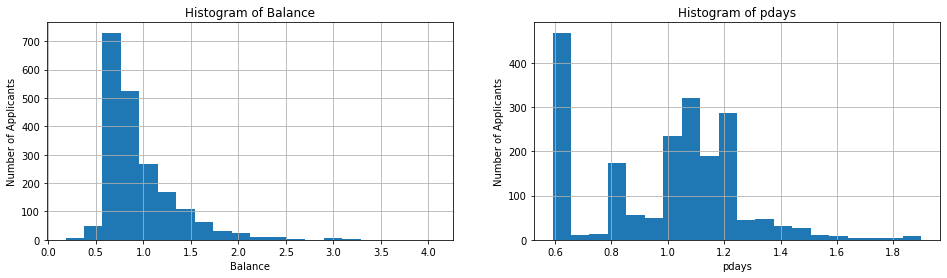

In [72]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Balance")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of Applicants')
df['balance'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of pdays")
ax3.set_xlabel('pdays')
ax3.set_ylabel('Number of Applicants')
df['pdays'].hist(bins=20)

plt.show()

In [73]:
df['balance'].value_counts()

0.630291    86
0.630660     9
0.725930     8
0.736272     7
0.631766     6
            ..
0.803334     1
1.594944     1
1.333318     1
4.063070     1
1.424065     1
Name: balance, Length: 1274, dtype: int64

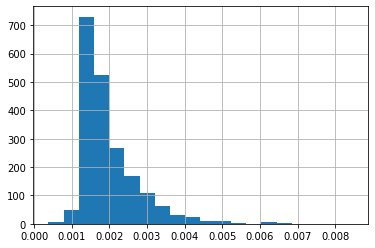

In [74]:
df['balance'] = df['balance']/480
df['balance'].hist(bins=20)
plt.show()

## Creation of Derived Features

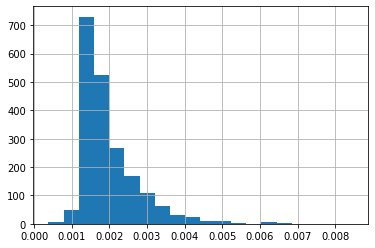

In [75]:
df['balance'].hist(bins=20)
plt.show()

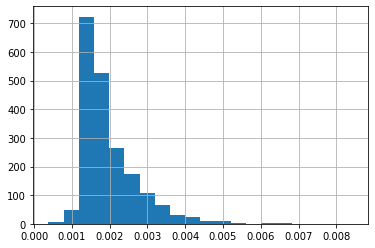

In [76]:
np.log(df['balance']+1).hist(bins=20)
plt.show()

In [78]:
df['previous'].value_counts()

0     454
1     438
2     407
3     240
4     150
5      85
6      57
7      44
8      32
9      23
10     19
11     12
12      9
13      8
14      7
15      2
16      2
17      2
23      2
51      1
19      1
20      1
27      1
29      1
38      1
55      1
Name: previous, dtype: int64

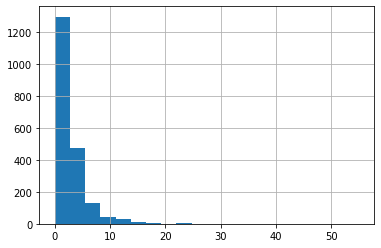

In [79]:
df['previous'].hist(bins=20)
plt.show()

In [80]:
# Create TotalContacts column and apply a log transformation
df['TotalContacts'] = df_original['campaign'] + df_original['previous']
df[['TotalContacts']] = robust_scaler.fit_transform(df[['TotalContacts']])
df[['TotalContacts']].min()

TotalContacts   -0.666667
dtype: float64

In [81]:
df['TotalContacts'] = np.log(df['TotalContacts']+1.67)

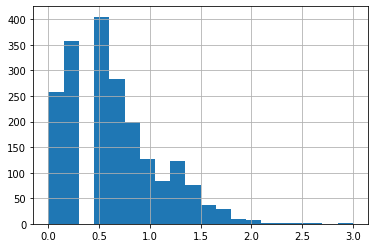

In [82]:
df['TotalContacts'].hist(bins=20)
plt.show()

## Saving CSV

In [83]:
df.to_csv('loans_train_prepared.csv')